# Proyek Klasifikasi Gambar: [Brain Tumor Classification (MRI)](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri)
- **Nama:** Indira Aline
- **Email:** indiradira63@gmail.com
- **ID Dicoding:** indira_kbs

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 867.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 1.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [ ]:
!pip install opencv-python

In [ ]:
!pip install scikit-image

In [ ]:
# Import common libraries packages
import json
import os
import shutil
import random
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import skimage.io as io
from skimage import io, img_as_ubyte
from skimage.transform import rotate, warp, AffineTransform
from skimage.exposure import adjust_gamma

# Import image processing libraries
from PIL import Image

import cv2
from tqdm import tqdm
from sklearn.utils import shuffle
import warnings

#Import modelling libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import ResNet50V2
from keras.regularizers import l2
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, regularizers

import tensorflowjs as tfjs

# Mount Google Drive (Colab)
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

# Ignore Warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Preparation

### Data Loading

In [ ]:
# Import module yang disediakan google colab untuk kebutuhan upload file

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yongpon","key":"1dd3283e358f8b2e41141009ae9eed48"}'}

In [ ]:
# Setup Kaggle API authentication
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!ls -l /root/.kaggle/

total 4
-rw------- 1 root root 63 Apr 21 04:46 kaggle.json


In [ ]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT


In [ ]:
import zipfile,os,shutil

In [ ]:
fileZip = "brain-tumor-classification-mri.zip"
extracZip = zipfile.ZipFile(fileZip, 'r')
extracZip.extractall("dataset")

In [ ]:
os.listdir("/content/dataset")

['Testing', 'Training']

In [ ]:
for dirname, _, filenames in os.walk('/content/dataset'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

/content/dataset/Testing/no_tumor/image(68).jpg
/content/dataset/Testing/no_tumor/image(18).jpg
/content/dataset/Testing/no_tumor/image(93).jpg
/content/dataset/Testing/no_tumor/image(15).jpg
/content/dataset/Testing/no_tumor/image(67).jpg
/content/dataset/Testing/no_tumor/image(51).jpg
/content/dataset/Testing/no_tumor/image(72).jpg
/content/dataset/Testing/no_tumor/image(41).jpg
/content/dataset/Testing/no_tumor/image(64).jpg
/content/dataset/Testing/no_tumor/image(35).jpg
/content/dataset/Testing/no_tumor/image(42).jpg
/content/dataset/Testing/no_tumor/image(7).jpg
/content/dataset/Testing/no_tumor/image(82).jpg
/content/dataset/Testing/no_tumor/image(97).jpg
/content/dataset/Testing/no_tumor/image(85).jpg
/content/dataset/Testing/no_tumor/image(45).jpg
/content/dataset/Testing/no_tumor/image(24).jpg
/content/dataset/Testing/no_tumor/image(89).jpg
/content/dataset/Testing/no_tumor/image(16).jpg
/content/dataset/Testing/no_tumor/image(4).jpg
/content/dataset/Testing/no_tumor/image(25

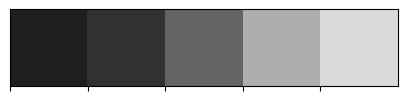

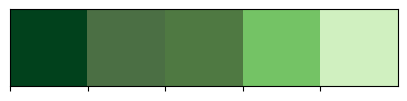

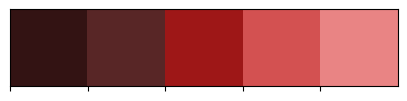

In [ ]:
colors_dark = ['#1F1F1F', '#313131', '#636363', '#AEAEAE', '#DADADA']
colors_red = ['#331313', '#582626', '#9E1717', '#D35151', '#E98484']
colors_green = ['#01411C', '#4B6F44', '#4F7942', '#74C365', '#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

In [ ]:
labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']

In [ ]:
labels[0]

'glioma_tumor'

In [ ]:
X_train = []
y_train = []
image_size = 150

# Load Training Data
for i in labels:
    folderPath = os.path.join('../content/dataset', 'Training', i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        y_train.append(i)

# Load Testing Data (Note: Ini akan ditambahkan ke X_train/y_train, mungkin kurang tepat)
for i in labels:
    folderPath = os.path.join('../content/dataset', 'Testing', i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        y_train.append(i)

# Konversi ke numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 204.07it/s]


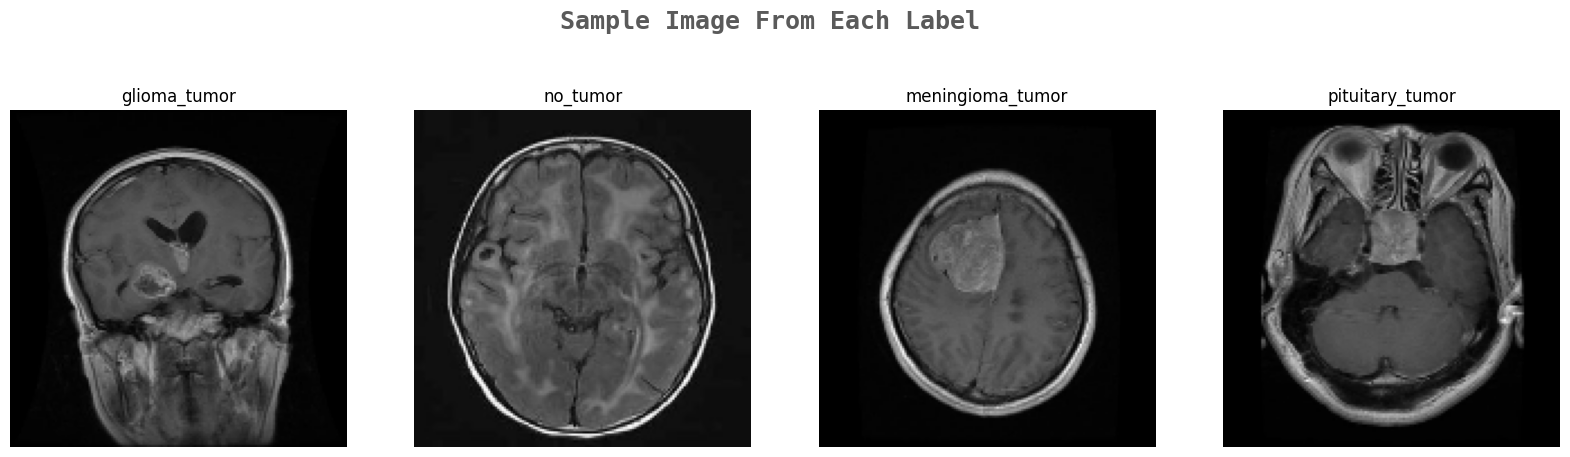

In [ ]:
k = 0
fig, ax = plt.subplots(1, 4, figsize=(20, 20))
fig.text(s='Sample Image From Each Label', size=18, fontweight='bold',
         fontname='monospace', color=colors_dark[1], y=0.62, x=0.4, alpha=0.8)

for i in labels:
    j = 0
    while True:
        if y_train[j] == i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k += 1
            break
        j += 1

In [ ]:
X_train, y_train = shuffle(X_train,y_train, random_state=10)

In [ ]:
X_train.shape

(3264, 150, 150, 3)

### Data Preprocessing

#### Split Dataset

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,  # Menggunakan X_train dan y_train
    test_size=0.2,     # 20% untuk Test Set
    random_state=42
)

# Bagi Train Set lagi menjadi Train dan Validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.25,    # 25% dari sisa 80% = 20% Validation
    random_state=42
)

# Cetak ukuran setiap set
print(f"Train Set: {X_train.shape}, {y_train.shape}")
print(f"Validation Set: {X_val.shape}, {y_val.shape}")
print(f"Test Set: {X_test.shape}, {y_test.shape}")

Train Set: (1958, 150, 150, 3), (1958,)
Validation Set: (653, 150, 150, 3), (653,)
Test Set: (653, 150, 150, 3), (653,)


In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

# Convert string labels to numerical indices for test set
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

# Convert string labels to numerical indices for validation set
y_val_new = []
for i in y_val:
    y_val_new.append(labels.index(i))
y_val = y_val_new
y_val = tf.keras.utils.to_categorical(y_val)

In [ ]:
effnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size,image_size,3))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Modelling

In [ ]:
# Inisialisasi model Sequential
model = Sequential([
    # Blok Convolutional 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    # Blok Convolutional 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Blok Convolutional 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten untuk Fully Connected Layer
    Flatten(),

    # Dense Layers
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(labels), activation='softmax')  # Output layer
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,035,716 (72.62 MB)

 Trainable params: 19,035,716 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks = [
    ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True),
    EarlyStopping(monitor='val_loss', patience=3)
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=callbacks
)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4328 - loss: 36.0160

62/62 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.4339 - loss: 35.6352 - val_accuracy: 0.6187 - val_loss: 0.9356
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6207 - loss: 0.9036

62/62 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.6212 - loss: 0.9029 - val_accuracy: 0.6815 - val_loss: 0.8271
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7317 - loss: 0.6870

62/62 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.7318 - loss: 0.6865 - val_accuracy: 0.7381 - val_loss: 0.6840
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8054 - loss: 0.5223

62/62 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.8055 - loss: 0.5220 - val_accuracy: 0.7856 - val_loss: 0.5756
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.8508 - loss: 0.4164 - val_accuracy: 0.7856 - val_loss: 0.6018
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8945 - loss: 0.3172

62/62 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8944 - loss: 0.3171 - val_accuracy: 0.8132 - val_loss: 0.5220
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9308 - loss: 0.1946

62/62 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.9304 - loss: 0.1952 - val_accuracy: 0.8224 - val_loss: 0.5324
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9339 - loss: 0.1694

62/62 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.9338 - loss: 0.1697 - val_accuracy: 0.8469 - val_loss: 0.6280
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.9452 - loss: 0.1417 - val_accuracy: 0.8407 - val_loss: 0.6079


## Evaluasi dan Visualisasi

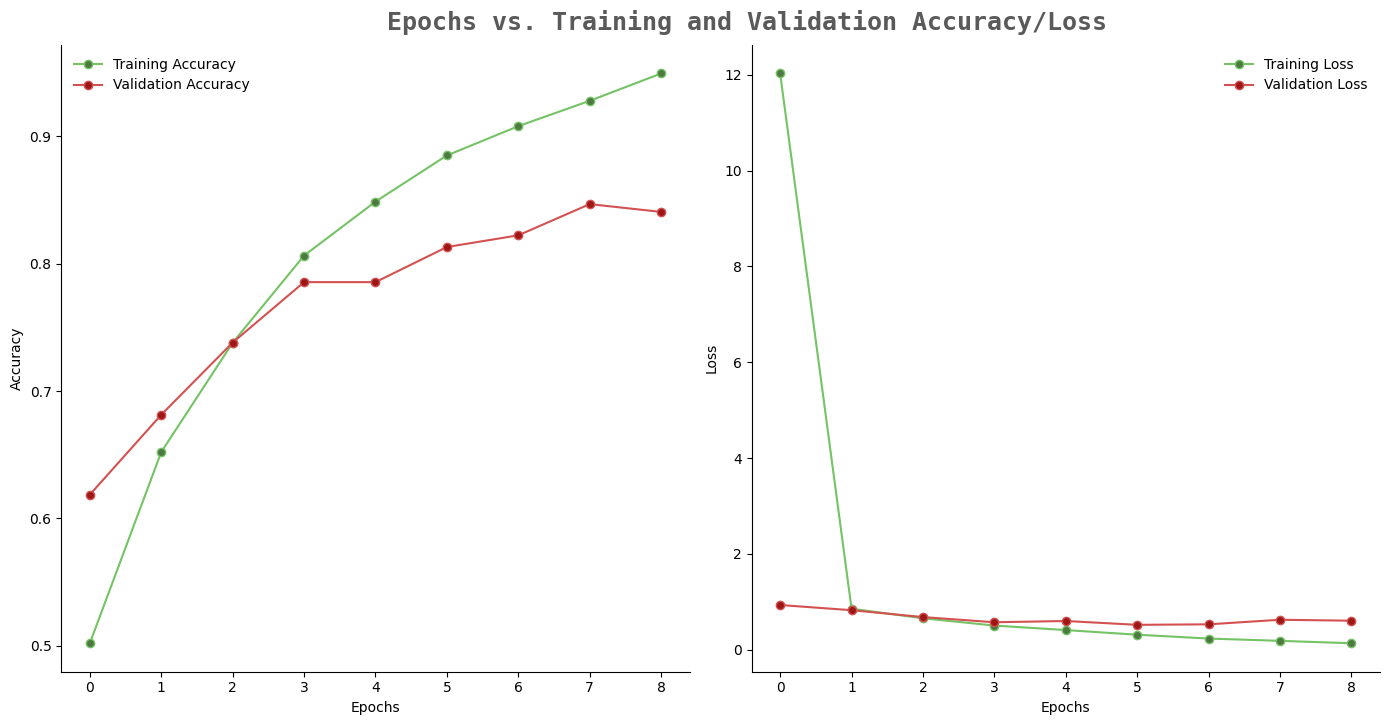

In [ ]:
# Get the actual number of epochs the training ran for
epochs = range(len(history.history['accuracy']))

fig, ax = plt.subplots(1, 2, figsize=(14, 7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss', size=18, fontweight='bold',
         fontname='monospace', color=colors_dark[1], y=1, x=0.28, alpha=0.8)

# Plot Accuracy
sns.despine()
ax[0].plot(epochs, train_acc, marker='o', markerfacecolor=colors_green[2], color=colors_green[3],
           label='Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o', markerfacecolor=colors_red[2], color=colors_red[3],
           label='Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

# Plot Loss
sns.despine()
ax[1].plot(epochs, train_loss, marker='o', markerfacecolor=colors_green[2], color=colors_green[3],
           label='Training Loss')
ax[1].plot(epochs, val_loss, marker='o', markerfacecolor=colors_red[2], color=colors_red[3],
           label='Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

plt.tight_layout()
plt.show()

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 364ms/step


In [ ]:
print(classification_report(y_test_new, pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       173
           1       0.82      0.77      0.79        98
           2       0.82      0.84      0.83       192
           3       0.90      0.97      0.93       190

    accuracy                           0.86       653
   macro avg       0.85      0.84      0.85       653
weighted avg       0.86      0.86      0.85       653



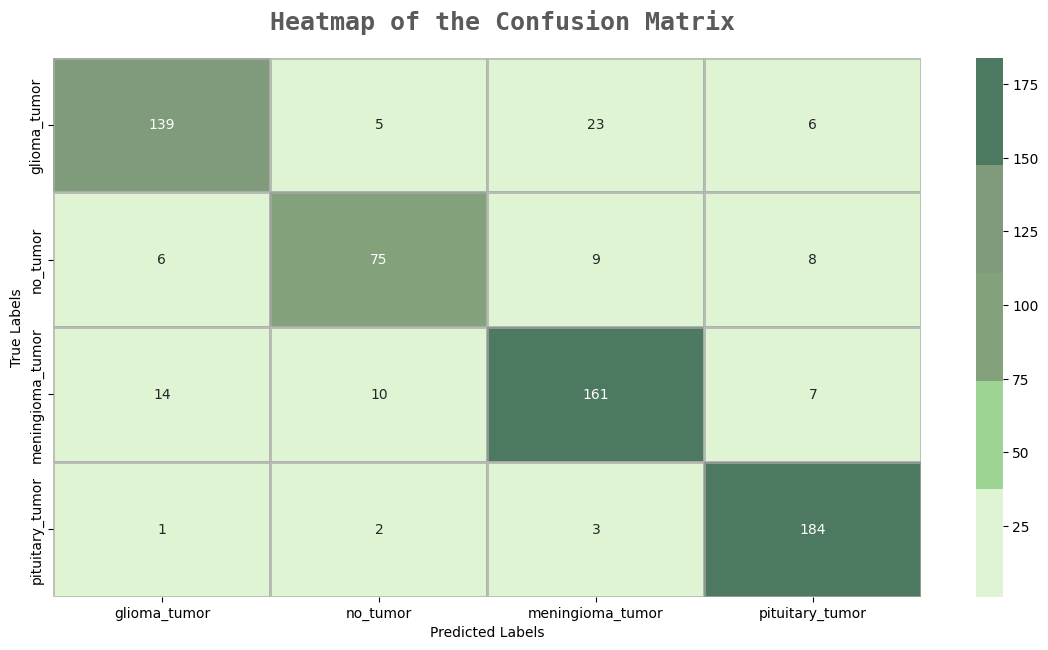

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

sns.heatmap(
    confusion_matrix(y_test_new, pred),
    ax=ax,
    xticklabels=labels,
    yticklabels=labels,
    annot=True,
    cmap=colors_green[::-1],
    alpha=0.7,
    linewidths=2,
    linecolor=colors_dark[3],
    fmt='d'  # Added to display integer values
)

fig.text(
    s='Heatmap of the Confusion Matrix',
    size=18,
    fontweight='bold',
    fontname='monospace',
    color=colors_dark[1],
    y=0.92,
    x=0.28,
    alpha=0.8
)

plt.xlabel('Predicted Labels')  # Added x-axis label
plt.ylabel('True Labels')       # Added y-axis label
plt.show()

## Konversi Model

In [ ]:
#Menyimpan model dalam format SavedModel
submission_folder = '/content/drive/MyDrive/Submission_Klasifikasi_Gambar-Indira_Aline'
os.makedirs(os.path.join(submission_folder, 'saved_model'), exist_ok=True)
saved_model_path = os.path.join(submission_folder, 'saved_model')
tf.saved_model.save(model, saved_model_path)
print(f"Model SavedModel disimpan di: {saved_model_path}")

Model SavedModel disimpan di: /content/drive/MyDrive/Submission_Klasifikasi_Gambar-Indira_Aline/saved_model


In [ ]:
#Menyimpan model dalam format TFLite
submission_folder = '/content/drive/MyDrive/Submission_Klasifikasi_Gambar-Indira_Aline'
tflite_path = os.path.join(submission_folder, 'tflite', 'model.tflite')
os.makedirs(os.path.dirname(tflite_path), exist_ok=True)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open(tflite_path, 'wb') as f:
    f.write(tflite_model)
print(f"Model TF-Lite disimpan di: {tflite_path}")

# Simpan label kelas untuk TF-Lite
labels_path = os.path.join(submission_folder, 'tflite', 'label.txt')
os.makedirs(os.path.dirname(labels_path), exist_ok=True)
class_labels = labels
with open(labels_path, 'w') as f:
    f.write('\n'.join(class_labels))
print(f"Label kelas TF-Lite disimpan di: {labels_path}")

Saved artifact at '/tmp/tmpx6ueftq_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor_249')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  134774467377296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134774467379024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134774467378256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134774463563344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134774463562768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134774463564112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134774463563536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134774463564880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134774463564304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134774463565648: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model TF-Lit

In [ ]:
#Menyimpan model dalam format TFJS
submission_folder = '/content/drive/MyDrive/Submission_Klasifikasi_Gambar-Indira_Aline'
tfjs_path = os.path.join(submission_folder, 'tfjs_model')
os.makedirs(tfjs_path, exist_ok=True)
tfjs.converters.save_keras_model(model, tfjs_path)
print(f"Model TFJS disimpan di: {tfjs_path}")

failed to lookup keras version from the file,
    this is likely a weight only file
Model TFJS disimpan di: /content/drive/MyDrive/Submission_Klasifikasi_Gambar-Indira_Aline/tfjs_model


In [ ]:
# Creating requirements.txt

!pip freeze > requirements.txt
!cp /content/requirements.txt /content/drive/MyDrive/Submission_Klasifikasi_Gambar-Indira_Aline/requirements.txt

## Inference (Optional)